Our outcomes have defined as: 

- Gelderland Expected Annual Damage
- Gelderland Dike Investment Costs
- Gelderland Expected Number of Deaths
- Overijssel Expected Annual Damage
- Overijssel Dike Investment Costs
- Overijssel Expected Number of Deaths
- RfR Total Costs
- Expected Evacuation Costs. 

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from ema_workbench import load_results
from ema_workbench.analysis import feature_scoring

from problem_formulation import get_model_for_problem_formulation

In [4]:
# Load the results of the baseline scenario
loaded_results = load_results('sequential_results.tar.gz')
experminents, outcomes = loaded_results

---
### 1. Feature Scaling

In [5]:
x = outcomes
y = experminents

In [6]:
# Import the model
dike_model, planning_steps = get_model_for_problem_formulation(3) 

In [7]:
# Because all levers are set to 0, they are removed from the outcomes
cleaned_y = y.drop(columns=[l.name for l in dike_model.levers])

In [12]:
# Get the feature scores
scores = feature_scoring.get_feature_scores_all(cleaned_y,x)

In [14]:
# Because investment costs will always be 0 when levers are set to 0, they are removed.
scores.drop(columns=['Gelderland Dike Investment Costs','Overijssel Dike Investment Costs','RfR Total Costs', 'Expected Evacuation Costs'], inplace=True)

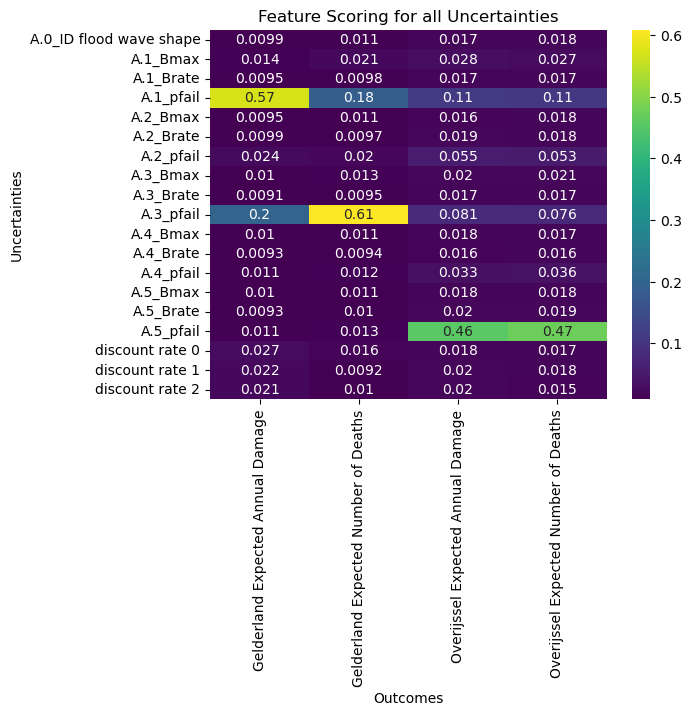

In [15]:
# Plot the feature scores
import seaborn as sns

sns.heatmap(scores, annot=True, cmap='viridis')
plt.title('Feature Scoring for all Uncertainties')
plt.xlabel('Outcomes')
plt.ylabel('Uncertainties')
plt.show()